# Домашнее задание. Свёрточные сети

Здесь вам предстоит построить и обучить свою первую свёрточную сеть для классификации изображений на данных CIFAR10.

In [ ]:
import tensorflow as tf

from tqdm import notebook

## Данные

CIFAR10
* 60000 RGB изображений размером 32x32x3
* 10 классов: самолёты, собаки, рыбы и т.п.

<img src="https://www.samyzaf.com/ML/cifar10/cifar1.jpg" style="width:60%">

Загрузите данные, разделите их на обучающую и тестовую выборки. Размер тестовой выборки должен быть $10^4$.

In [ ]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(40000, 32, 32, 3) (40000, 1)


Прежде чем приступать к основной работе, стоит убедиться что загруженно именно то, что требовалось:

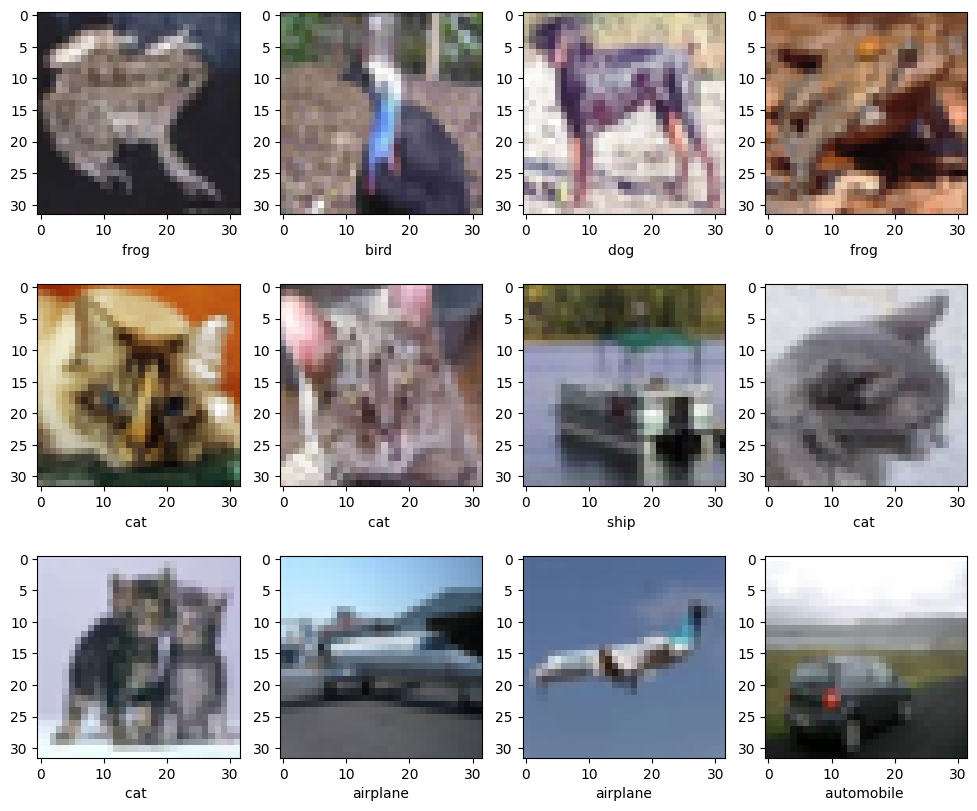

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

## Подготовка данных

Сейчас каждый пиксель изображения закодирован тройкой чисел (RGB) __от 0 до 255__. Однако лучше себя показывает подход, где значения входов нейросети распределены недалеко от 0.

Давайте приведём все данные в диапазон __`[0, 1]`__ — просто разделим на соответствующий коэффициент:

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Исполните код ниже для проверки, что все выполнено корректно.

In [ ]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

## Архитектура сети

Для начала реализуйте простую нейросеть:
1. принимает на вход картинки размера 32 x 32 x 3;
2. вытягивает их в вектор (`keras.layers.Flatten`);
3. пропускает через 1 или 2 полносвязных слоя;
4. выходной слой отдает вероятности принадлежности к каждому из 10 классов.

Создайте полносвязную сеть:

In [ ]:
import keras
from keras import layers as L
from keras import backend as K

In [ ]:
model = tf.keras.models.Sequential([
        L.Dense(32, activation='relu', input_shape=X_train.shape[1:]),
        L.Flatten(),
        L.Dense(32, activation='relu'),
        L.Dense(32, activation='relu'),
        L.Dense(10, activation='softmax')
])

In [ ]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Успех!


## Обучение сети

**Задание 1.1 (обязательно)** Будем минимизировать многоклассовую кроссэкнропию с помощью __sgd__. Вам нужно получить сеть, которая достигнет __не менее 45%__ __accuracy__ на тестовых данных.

In [ ]:
y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=32, callbacks=callbacks, validation_split=0.2)

Epoch 1/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.2228 - loss: 2.1100 - val_accuracy: 0.3685 - val_loss: 1.7831
Epoch 2/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.3896 - loss: 1.7402 - val_accuracy: 0.4024 - val_loss: 1.6827
Epoch 3/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.4248 - loss: 1.6129 - val_accuracy: 0.4405 - val_loss: 1.5954
Epoch 4/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.4489 - loss: 1.5454 - val_accuracy: 0.4538 - val_loss: 1.5265
Epoch 5/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.4744 - loss: 1.4747 - val_accuracy: 0.4606 - val_loss: 1.5242
Epoch 6/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.4974 - loss: 1.4228 - val_accuracy: 0.4754 - val_loss: 1.4844
Epoch 7/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.5119 - loss: 1.3743 - val_accuracy: 0.4882 - val_loss: 1.4397
Epoch 8/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.5263 -

А теперь можно проверить качество сети, выполнив код ниже:

In [ ]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

 Test_acc = 0.5044
 Not bad!


## Карманная сверточная сеть

**Задание 1.2 (обязательно)** Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [ ]:
new_model = tf.keras.models.Sequential([
    L.Input(shape=X_train.shape[1:]),
    L.Conv2D(filters=10,
            kernel_size=(3, 3),
            padding='same',
            activation='relu'),
    L.MaxPool2D(pool_size=(2, 2), padding='valid'),
    L.Flatten(),
    L.Dense(100, activation='relu'),
    L.Dense(10, activation='softmax')
])

In [ ]:
new_callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='new_model.{epoch:02d}-{val_loss:.2f}.keras'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]

In [ ]:
new_model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
new_model.fit(X_train, y_train, batch_size=16, epochs=32, callbacks=new_callbacks, validation_split=0.2)

Epoch 1/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.2520 - loss: 2.0691 - val_accuracy: 0.4109 - val_loss: 1.6601
Epoch 2/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.4337 - loss: 1.6065 - val_accuracy: 0.4787 - val_loss: 1.4614
Epoch 3/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.4968 - loss: 1.4207 - val_accuracy: 0.5060 - val_loss: 1.3949
Epoch 4/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.5327 - loss: 1.3254 - val_accuracy: 0.5286 - val_loss: 1.3214
Epoch 5/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.5601 - loss: 1.2488 - val_accuracy: 0.5275 - val_loss: 1.3222
Epoch 6/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.5827 - loss: 1.1879 - val_accuracy: 0.5623 - val_loss: 1.2479
Epoch 7/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.5978 - loss: 1.1304 - val_accuracy: 0.5646 - val_loss: 1.2303
Epoch 8/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.6209 -

Давайте посмотрим, смогла ли карманная сверточная сеть побить заданный порог по качеству:

In [ ]:
from sklearn.metrics import accuracy_score

predict_x = new_model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

 Test_acc = 0.586
 Not bad!


## Учимся учить

**Задание 1.3 (опционально)** Попробуйте использовать различные методы оптимизации (sgd, momentum, adam) с параметрами по умолчанию. Какой из методов работает лучше?

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
def create_model():
  model_opt = tf.keras.models.Sequential([
  L.Input(shape=X_train.shape[1:]),
  L.Conv2D(filters=10,
          kernel_size=(3, 3),
          padding='same',
          activation='relu'),
  L.MaxPool2D(pool_size=(2, 2), padding='valid'),
  L.Flatten(),
  L.Dense(100, activation='relu'),
  L.Dense(10, activation='softmax')
  ])
  return model

In [ ]:
optimizers = {
    'SGD': optimizers.SGD(),
    'Momentum': optimizers.SGD(momentum=0.9),
    'Adam': optimizers.Adam(),
    'RMSprop': optimizers.RMSprop()
}

In [ ]:
results = {}
for opt_name, optimizer in optimizers.items():
    print(f'Обучение с оптимизатором: {opt_name}')
    opt_model = create_model()
    opt_callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='opt_model.{epoch:02d}-{val_loss:.2f}.keras'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]
    opt_model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    opt_model.fit(X_train, y_train, batch_size=16, epochs=32, callbacks=opt_callbacks, validation_split=0.2)

    predict_x_opt = opt_model.predict(X_test)
    classes_x_opt = np.argmax(predict_x_opt, axis=1)

    test_acc_opt = accuracy_score(y_test, classes_x_opt)
    results[opt_name] = test_acc_opt

print("Accuracy на тестовой выборке в зависимости от выбранного оптимизатора:")
for opt_name, accuracy in results.items():
    print(f"{opt_name}: {accuracy:.4f}")

Обучение с оптимизатором: SGD
Epoch 1/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6240 - loss: 1.0978 - val_accuracy: 0.5351 - val_loss: 1.4877
Epoch 2/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.6906 - loss: 0.8827 - val_accuracy: 0.4905 - val_loss: 1.7580
Epoch 3/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7009 - loss: 0.8527 - val_accuracy: 0.5459 - val_loss: 1.4539
Epoch 4/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7167 - loss: 0.8136 - val_accuracy: 0.5587 - val_loss: 1.4410
Epoch 5/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7104 - loss: 0.8167 - val_accuracy: 0.5673 - val_loss: 1.4328
Epoch 6/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7163 - loss: 0.8068 - val_accuracy: 0.5707 - val_loss: 1.3963
Epoch 7/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7218 - loss: 0.7911 - val_accuracy: 0.5629 - val_loss: 1.4377
Epoch 8/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 

Лучшие значения метрики Accuracy получились при использовании оптимизатора SGD. Это может быть связано с тем, что возможно при SGD удалось проскочить через локальные минимумы и найти более глобальные минимумы, а более сложные методы "застряли" в локальном минимуме.

**Задание 1.4 (опционально)** Добавьте нормализацию по батчу (`BatchNormalization`) между свёрткой и активацией. Попробуйте использовать несколько нормализаций — в свёрточных и полносвязных слоях.

In [ ]:
base_model = tf.keras.models.Sequential([
    L.Input(shape=X_train.shape[1:]),
    L.Conv2D(filters=10,
            kernel_size=(3, 3)),
    L.MaxPool2D(pool_size=(2, 2), padding='valid'),
    L.Activation('relu'),
    L.Flatten(),
    L.Dense(100, activation='relu'),
    L.Dense(10, activation='softmax')
])

conv_batchnorm = tf.keras.models.clone_model(base_model) #добавляем BatchNormalization между сверткой и активацией
conv_batchnorm.layers.insert(3, L.BatchNormalization())
dence_batchnorm = tf.keras.models.clone_model(base_model) #добавляем BatchNormalization после полносвязного слоя
dence_batchnorm.layers.insert(6, L.BatchNormalization())
both_batchnorm = tf.keras.models.clone_model(conv_batchnorm) #добавляем BatchNormalization между сверткой и активацией и после полносвязного слоя
both_batchnorm.layers.insert(7, L.BatchNormalization())

In [ ]:
batch_models = {'base_model': base_model,
                'conv_batchnorm': conv_batchnorm,
                'dence_batchnorm': dence_batchnorm,
                'both_batchnorm': both_batchnorm}
batch_res = {}

In [ ]:
for name_mod, model in batch_models.items():
  batch_callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.EarlyStopping(patience=3)]
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=16, epochs=32, callbacks=batch_callbacks, validation_split=0.2)

  predict_x_batch = model.predict(X_test)
  classes_x_batch = np.argmax(predict_x_batch, axis=1)
  test_acc_batch = accuracy_score(y_test, classes_x_batch)
  batch_res[name_mod] = test_acc_batch

for name_mod, accuracy in batch_res.items():
  print(f"{name_mod}: {accuracy:.4f}")

Epoch 1/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3793 - loss: 1.7133 - val_accuracy: 0.5174 - val_loss: 1.3457
Epoch 2/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5542 - loss: 1.2551 - val_accuracy: 0.5506 - val_loss: 1.2647
Epoch 3/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5996 - loss: 1.1333 - val_accuracy: 0.5730 - val_loss: 1.2042
Epoch 4/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6387 - loss: 1.0221 - val_accuracy: 0.5831 - val_loss: 1.2045
Epoch 5/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6682 - loss: 0.9396 - val_accuracy: 0.5931 - val_loss: 1.1825
Epoch 6/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7013 - loss: 0.8436 - val_accuracy: 0.5930 - val_loss: 1.2220
Epoch 7/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7262 - loss: 0.7774 - val_accuracy: 0.6014 - val_loss: 1.2251
Epoch 8/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7534 - loss: 0.7034

Наилучшее Accuracy получилось с использованием BatchNormalization и после сверточного слоя и после полносвязного слоя. Результат можно обосновать тем, что использование нормализации только после сверточного слоя и только после полносвязного слоя  может недостаточно стабилизировать обучение и сходимость в сверточных слоях и не полностью решить проблему исчезающего градиента в полносвязных слоях.

## Свёрточная нейросеть
**Задание 1.7 (обязательно попытаться)** Обучим большую свёрточную сеть, которая даст на тестовой выборке __accuracy больше 80%__. В этом задании вам потребуется провести эксперименты, сравнив их между собой в конце.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
val_datagen = ImageDataGenerator()

split = 45000
#dg_x_train, dg_x_val = X_train[:split], X_train[split:]
#dg_y_train, dg_y_val = y_train[:split], y_train[split:]

dg_x_train, dg_x_val = X_train, X_val
dg_y_train, dg_y_val = y_train, y_val

In [ ]:
#Создаем модель с архитектурой ResNet
#Первый блок
inputs = keras.Input(shape=X_train.shape[1:])
x = L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
block_1_output = L.MaxPool2D(pool_size=(3, 3))(x)
#Второй блок
x = L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(block_1_output)
x = L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
block_2_output = L.add([x, block_1_output])
#Выходной блок
x = L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(block_2_output)
x = L.GlobalAveragePooling2D()(x)
x = L.Dense(256, activation='relu')(x)
x = L.Dropout(0.3)(x)
outputs = L.Dense(10, activation='softmax')(x)

final_model = keras.Model(inputs, outputs)

In [ ]:
final_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

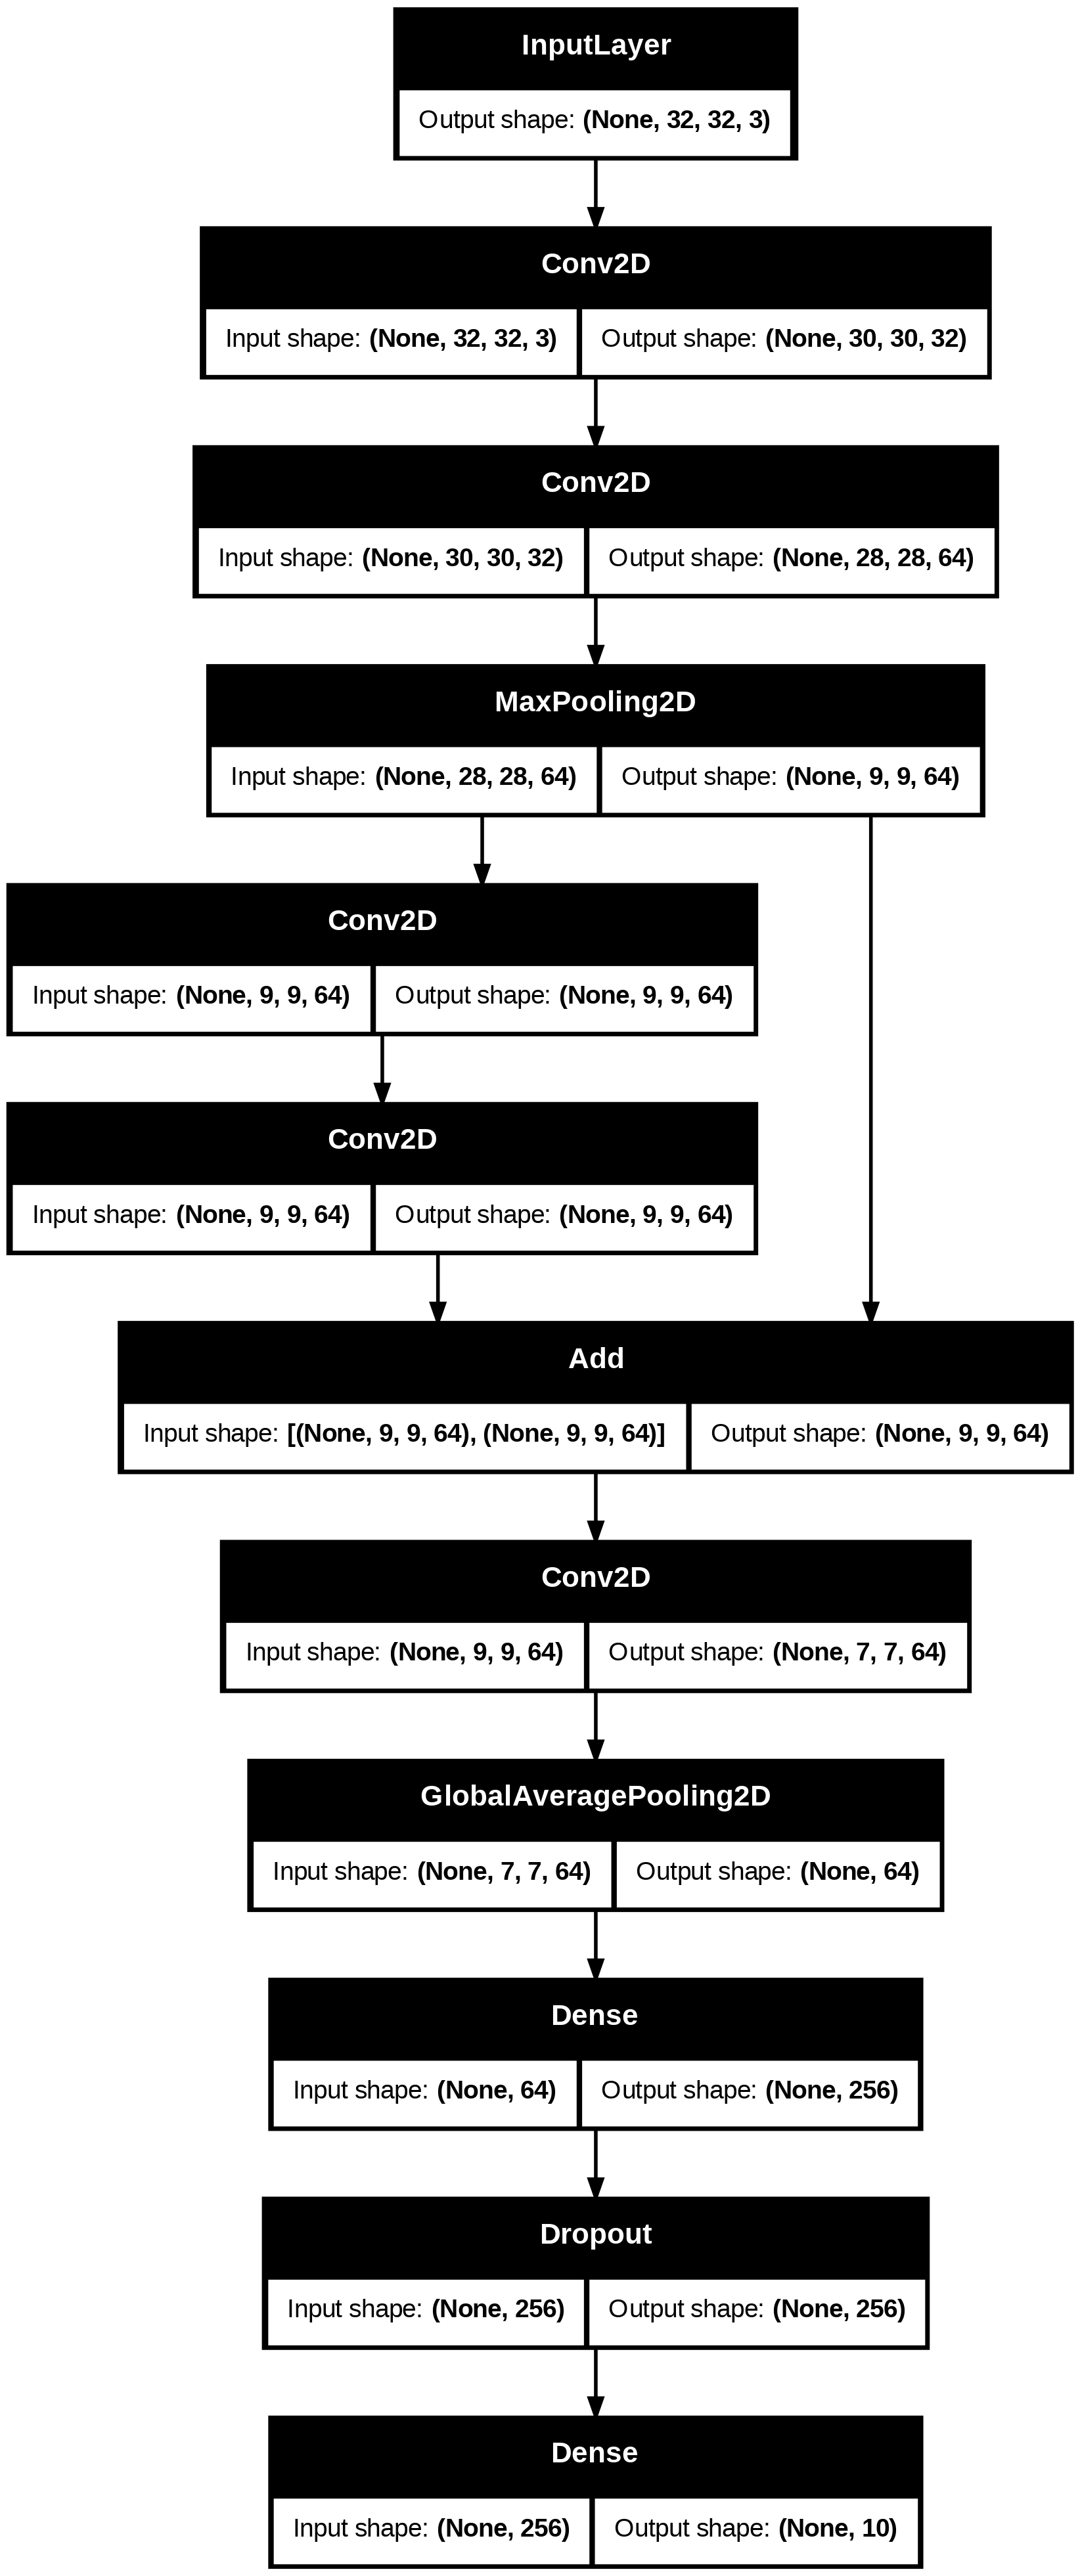

In [ ]:
tf.keras.utils.plot_model(final_model, '123.png', show_shapes=True)

In [ ]:
final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
final_model.fit(datagen.flow(dg_x_train, dg_y_train, batch_size=16), epochs=32, callbacks=final_callbacks, validation_data=val_datagen.flow(dg_x_val, dg_y_val))

Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.2539 - loss: 1.9526 - val_accuracy: 0.5044 - val_loss: 1.3426
Epoch 2/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.4929 - loss: 1.3821 - val_accuracy: 0.5622 - val_loss: 1.2327
Epoch 3/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.5690 - loss: 1.1965 - val_accuracy: 0.6221 - val_loss: 1.0694
Epoch 4/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.6122 - loss: 1.0784 - val_accuracy: 0.6569 - val_loss: 0.9631
Epoch 5/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6470 - loss: 0.9854 - val_accuracy: 0.6500 - val_loss: 1.0303
Epoch 6/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6717 - loss: 0.9370 - val_accuracy: 0.7061 - val_loss: 0.8135
Epoch 7/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.6897 - loss: 0.8783 - val_accuracy: 0.7230 - val_loss: 0.7778
Epoch 8/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7038 - loss: 0.84

Проверьте, какого качества достигла ваша сеть.

In [ ]:
from sklearn.metrics import accuracy_score

predict_x=final_model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
if test_acc > 0.8:
    print("Это победа!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Test_acc = 0.7982


Ну, почти получилось (:

По результатам выполнения работы можно сделать вывод о том, что переход от простых по реализации НС к НС с архитектурой модели ResNet приводит к значительному увеличению точности модели.